<a href="https://colab.research.google.com/github/vddavydova/colab/blob/main/%D0%9E%D0%9E%D0%9F_%D0%B2_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ООП в Matplotlib

## Объекты библиотеки Matplotlib

До сих пор мы использовали т.н. _структурный подход_ к построению графиков: мы объявляли команды, связанные с построением графиков, задавали для них какие-то параметры и пр. Плюсами такого подхода являются простота реализации, краткость и понятность кода.

/*
Python поддерживает несколько парадигм программирования: структурное, объектно-ориентированное, функциональное, императивное и аспектно-ориентированное.
*\

Однако, такой подход не позволяет создавать более сложные графические конструкции. Для таких целей в библиотеке `matplotlib` предусмотрена возможность применить _объектно-ориентированный подход_.

Рассмотрим основные объекты библиотеки `matplotlib` - `Figure` и `Axes`. `Figure` (фигура) - это, грубо говоря, некоторое выделенное место, на котором могут располагаться один или несколько графиков. Такие графики называют объектами `Axes` (оси).

Когда мы запускаем команды для построения графиков, мы не следим за тем, какие объекты при этом создаются, поскольку при структурном подходе такие возможности от нас скрыты. Поэтому здесь, как правило, используется одна фигура, внутри которой размещается один график.

Ранее мы научились строить несколько графиков внутри одного изображения:

In [ ]:
какая-то_ф-ция(axis=1) # не путать с axes

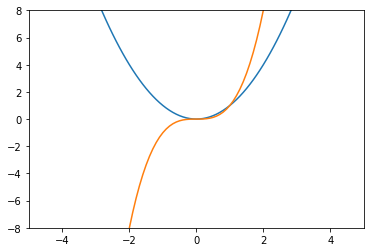

In [ ]:
plt.plot(x, y)
plt.plot(x, y2)

plt.axis([-5, 5, -8, 8])

plt.show()

Но что если мы хотели бы построить эти графики не внутри одного изображения, а рядом друг с другом? Это можно сделать, используя объектно-ориентированный подход. Объекты `Figure` и `Axes` можно получить с помощью функции `plt.subplots`. В эту функцию мы подаём желаемое количество "строк" и "столбцов" нашей фигуры. Каждый элемент такой "таблицы" будет занят одним графиком `Axes`. Данная функция возвращает объект `Figure`, а также описанную выше "таблицу" из объектов `Axes`.

Например, построим фигуру, содержащую один графиик, а именно график функции $y = x^2$. В этом случае второе возвращаемое значение содержит в себе лишь один объект `Axes`: 

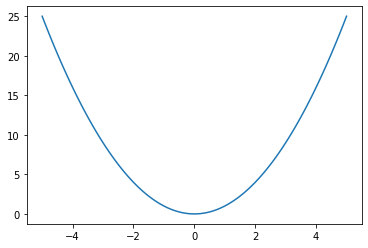

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(x, y)

Если же мы укажем большее число строк или столбцов, второе возвращаемое значение будет содержать в себе многомерный массив `numpy`, содержащий нужное число объектов `Axes`. Например, построим графики наших функций $y = x^2$ и $y = x^3$ на двух графиках, располагающихся последовательно в одной "строке":

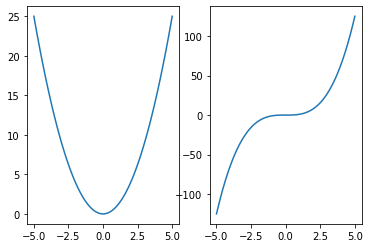

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].plot(x, y)
ax[1].plot(x, y2)

В нашем случае размер фигуры уже задан. Поэтому когда мы пытаемся разместить внутри этой фигуры несколько графиков, их масштабы оказываются не очень реалистичными. Однако, теперь мы можем непосредственно управлять размером фигуры, поскольку у нас есть доступ к объекту `Figure`. С помощью методов этого объекта мы можем задать размер фигуры, а также немного "отодвинуть" графики друг от друга, задав расстояние между ними в ширину.

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)

fig.set_size_inches(8.5, 3.5)
fig.subplots_adjust(wspace=0.3)

ax[0].plot(x, y)
ax[1].plot(x, y2)

Отметим, что значение, передаваемое в параметр `wspace` метода `.subplots_adjust` - это не дюймы, а доли от среднего значения горизонтальных осей графика.

Аналогично мы можем расположить графики и по вертикали. В этом случае для определения расстояния между графиками нужно использовать не параметр `wspace` (здесь `w` - _width_, т.е. ширина), а парметр `hspace` (`h` - _height_, высота).

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1)

fig.set_size_inches(3, 6)
fig.subplots_adjust(hspace=0.25)

ax[0].plot(x, y)
ax[1].plot(x, y2)

Обратите внимание, что несмотря на то, что в нашей фигуре теперь имеется не одна "строка" и два "столбца", две "строки" и один "столбец", массив `ax` всё ещё содержит одномерный массив, поскольку одно из измерений у нас всё ещё размера 1. Чтобы избежать путаницы с индексами, можно использовать метод `.flatten` массива `numpy`, который выравнивает многомерный массив до одномерного, располагая его строки последовательно друг за другом:

In [ ]:
ar = np.array([[1, 2],
               [3, 4]])

ar.flatten()

array([1, 2, 3, 4])

Добавим ещё несколько графиков и построим фигуру, состоящую из четырёх графиков. Поскольку мы хотим, чтобы у нашей фигуры было 2 "строки" и 2 "столбца", массив `ax` будет двумерным. Применив к нему метод `.flatten`, мы получим новый массив, в котором сначала будут идти все графики `Axes` из первой строки, а затем все графики из второй строки:

In [ ]:
y3 = np.sin(x)
y4 = np.cos(x)

fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

fig.set_size_inches(8, 6)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.plot(x, y)
ax2.plot(x, y2)
ax3.plot(x, y3)
ax4.plot(x, y4)

Каждый из этих графиков можно отдельно редактировать наподобие того, как мы это делали выше, используя структурный подход. Например, зададим название каждого из графиков:

Text(0.5, 1.0, 'График cos(x)')

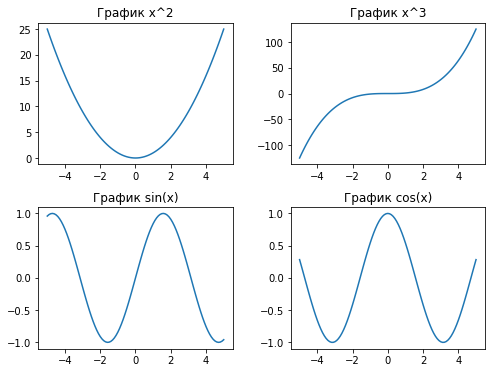

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

fig.set_size_inches(8, 6)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.plot(x, y)
ax1.set_title("График x^2")

ax2.plot(x, y2)
ax2.set_title("График x^3")

ax3.plot(x, y3)
ax3.set_title("График sin(x)")

ax4.plot(x, y4)
ax4.set_title("График cos(x)")

У функции `plt.subplots` есть два интересных параметра: `sharex` и `sharey`. Они отвечают за то, хотим ли мы, чтобы у всех графиков из нашей фигуры была одинаковая шкала по оси `x` или `y`:

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
ax1, ax2, ax3, ax4 = ax.flatten()

fig.set_size_inches(8, 6)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.plot(x, y)
ax2.plot(x, y2)
ax3.plot(x, y3)
ax4.plot(x, y4)

Индивидуально для каждого графика можно задать его пределы по оси `x` и `y` с помощью методов `.set_xlim` и `.set_ylim`:

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

fig.set_size_inches(8, 6)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.plot(x, y)
ax1.set_ylim([0, 25])

ax2.plot(x, y2)
ax2.set_xlim([-10, 10])

ax3.plot(x, y3)
ax4.plot(x, y4)